# Investigating Fandango Movie Ratings

The purpose of this project is the research if Fandango, a popular review site is inflating movie ratings. This analysis stems from previous research done by Walt Hickey who found the ratings were inflated. Ratings were rounded significantly in 8% of the cases analyzed and generally high. Here is [LINK](https://fivethirtyeight.com/features/fandango-movies-ratings/) to the research article for reference.

In [1]:
import pandas as pd
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

### Data Profiling and Cleaning

In [2]:
previous.head()

# reviewing the old dataset with high ratings

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
after.head()

# reviewing the latest dataset with TBD ratings

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

# updating dataset to columns needed for the analysis

In [5]:
fandango_previous.head(3)

# reviewing high review dataset with updated columns

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [6]:
fandango_after.head(3)

# reviewing latest dataset (tbd reviews) with updated columns

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


### Defining the Population of Interest

The population of interest for this project is all movies rated in fandango as we want to determine if the reviews are biased are not.  After reviewing the READ.md files on the datasets, the sampled datasets are not random.  The 2015 data has at least 30 fan reviews and 2016/17 dataset has "a significant number of votes". This isn't extremely clear if these are comparable datasets and leaves out non-popular movies capturing only a cluster of the fandango dataset.

When proceeding with the current data, we can adjust the poulation of interest to "popular movies" which will likely still be a good proxy to all fandango movies. We will also need to confirm the latest dataset is comparable with reviews / all movies have at least 30 reviews like the 2015 data.

In [7]:
sum(fandango_previous['Fandango_votes'] < 30)

# confirming the inital dataset includes only movies with 30 reviews or more

0

There doesn't appear to be any columns in the 2016/17 dataset to measure the popularity of the movie. One way we could do this is by taking a random sample and checking on the website directly

In [17]:
fandango_after.sample(n=15, random_state = 1)

# random sample to confirm.  I can't find ratings onthe website anymore but the solution set states most are above 30

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


### Data Cleaning

In [9]:
fandango_after["year"].value_counts()

# reviewing 2016/17 dataset value counts by year

2016    191
2017     23
Name: year, dtype: int64

In [10]:
fandango_2016 = fandango_after[fandango_after["year"]==2016]

# splitting dataset into 2016 data

In [11]:
fandango_2016.head()

# previewing 2016 movies dataset 

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [18]:
fandango_2015 = fandango_previous

# splitting dataset into 2017 movies

In [19]:
fandango_2015.head()

# previewing 2017 movies dataset

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


### Data Visualization Comparing Ratings by Year

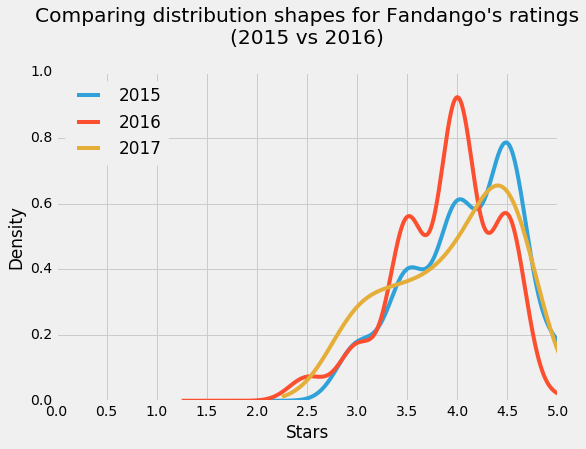

In [23]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
fandango_2016['fandango'].plot.kde(label = '2016', legend = True, figsize = (8,5.5))
fandango_2017['fandango'].plot.kde(label = '2017', legend = True, figsize = (8,5.5))

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

# KDE plot of 2015 vs 2016 data

Based on the kernal density plot, it appears ratings were skewed left in 2015 and somewhat normally distributed in 2016 with a mean of 4 stars. In 2017 it appears the ratings are similar to 2015 again and skewed left.

In [25]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()
mean_2017 = fandango_2017['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()
median_2017 = fandango_2017['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0] 
mode_2017 = fandango_2017['fandango'].mode()[0]

summary = pd.DataFrame()

summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary['2017'] = [mean_2017, median_2017, mode_2017]

summary.index = ['mean', 'median', 'mode']

summary

# comparing the mean, median and modes of 2015, 2016 and 2017

,2015,2016,2017
mean,4.089041,3.887435,3.956522
median,4.000000,4.000000,4.000000
mode,4.500000,4.000000,4.500000


That table above confirms ratings did decrease from 2015 to 2016 by .2 stars which fairly significant and decreased in from 2015 to 2017 by .13 stars. The mean of the ratings did come down however the distribution went from skewed left to normal to skewed left. 

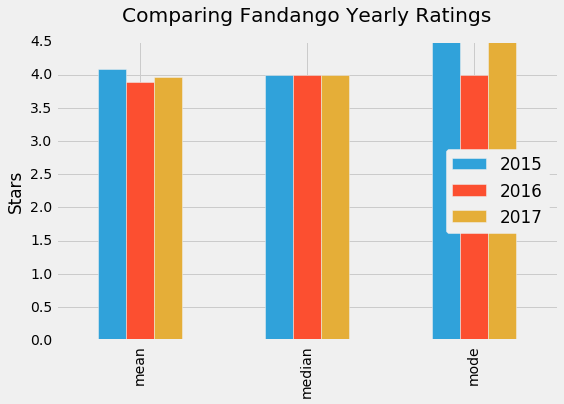

In [67]:
ax = summary.plot.bar(figsize = (8,5))

ax.legend(loc=7)
plt.xlim(-.5,2.5)
plt.title("Comparing Fandango Yearly Ratings", y = 1.05) # the `y` parameter pads the title upward
plt.ylabel('Stars')
plt.show()

# plotting yearly mean, median and mode in a bar chart

### Conclusions

We can see the mean ratings decreased since Walt Hickey published his research. The decrease in mean was .2 in from 2015 to 2016 and .12 from 2015 to 2017 which is noteable. It is likely the inital ratings were biased and have been adjusted to some extent.